# Question 2

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Part A

Let $r$ be the randomly generated number between 0 and 1. If we want randomly generated numbers between $a$ and $b$, we need to linearly scale the function.

In [39]:
a=2; b=5

In [40]:
def ran_ab(a,b):
    return a+b*np.random.rand()

Lets make sure this works.

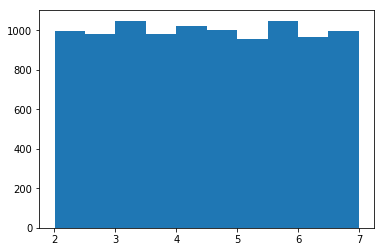

In [41]:
test_1 = np.array([ran_ab(a,b) for i in range(10000)])
_, x, y = plt.hist(test_1)
plt.show()

Looks approximately equally distributed. Now we need to scale it be an arbitrary probability density function $w(s)$.

In [43]:
def w(s):
    return s-s**2

def rand_w(a, b, w):
    return w(ran_ab(a,b))

Lets see if this works.

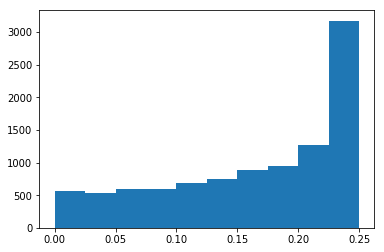

In [44]:
test_2 = np.array([rand_w(0,1,w) for i in range(10000)])
plt.hist(test_2)
plt.show()